In [1]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import pyarrow.parquet as pq
from datetime import timedelta

# visualization
import matplotlib.pyplot as plt
from matplotlib import gridspec
import seaborn as sns

%matplotlib inline

# configure visualizations
sns.set_style('whitegrid')
figsize=(8,6)

In [2]:
def load_df(path, columns=None, use_threads=True):
    try:
        return pq.read_table(path, columns=columns, use_threads=use_threads).to_pandas()
    except Exception as e:
        print(e)

def downcast_ints(df):
    # downcast int types
    df_int = df.select_dtypes(include=['int'])
    converted_int = df_int.apply(pd.to_numeric, downcast='unsigned')
    df[converted_int.columns] = converted_int
    
    return df
        
def prepare(path,cols):

    df = load_df(path,cols)
    df = df.reset_index(drop=True)
    df = downcast_ints(df)
    
    return df

In [3]:
def pieOthers(dfVars,dfVals,threshold):
    df = pd.DataFrame(
        data = {'var': dfVars, 'value' : dfVals},
        ).sort_values('value', ascending = False)
    
    if threshold > 0 :
        df2 = df[:threshold].copy()
        new_row = pd.DataFrame(data = {
            'var' : ['Others'],
            'value' : [dfVals[threshold:].sum()]
        })

        df2 = pd.concat([df2, new_row])
    else:
        df2 = df
        
    percent = 100.*df2['value']/df2['value'].sum()
    labels = ['{0} - {1:1.2f} %'.format(i,j) for i,j in zip(df2['var'], percent)]
    #labels = ['{0} - {1}'.format(i,j) for i,j in zip(df2['var'], df2['value'])]
    
    colorsX = plt.cm.tab20.colors
    patches, texts = plt.pie(df2['value'], shadow=True, startangle=90, colors = colorsX)
    plt.legend(patches, labels, loc="best")
    plt.axis('equal')
    plt.tight_layout()
    plt.show()
    


In [4]:
cols = ['bluetooth_enabled', 'location_enabled', 'power_saver_enabled', 'flashlight_enabled', 'nfc_enabled', 'unknown_sources', 'developer_mode']
df = prepare('2-datasets/settings.parquet',cols)

In [5]:
df.head(100)

,bluetooth_enabled,location_enabled,power_saver_enabled,flashlight_enabled,nfc_enabled,unknown_sources,developer_mode
0,0,1,0,0,0,0,0
1,0,1,0,0,0,0,0
2,0,1,0,0,0,0,0
3,0,1,0,0,0,0,0
4,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...
95,0,0,0,0,1,1,0
96,0,0,0,0,1,1,0
97,0,0,0,0,1,1,0
98,0,0,0,0,1,1,0


In [6]:
dfBluetoothGB = df.groupby(['bluetooth_enabled'])['bluetooth_enabled'].count().reset_index(name='count').sort_values(['count'], ascending=False).head(20)
dfLocationGB = df.groupby(['location_enabled'])['location_enabled'].count().reset_index(name='count').sort_values(['count'], ascending=False).head(20)
dfPowerSaverGB = df.groupby(['power_saver_enabled'])['power_saver_enabled'].count().reset_index(name='count').sort_values(['count'], ascending=False).head(20)
dfFlashlightGB = df.groupby(['flashlight_enabled'])['flashlight_enabled'].count().reset_index(name='count').sort_values(['count'], ascending=False).head(20)
dfNfcGB = df.groupby(['nfc_enabled'])['nfc_enabled'].count().reset_index(name='count').sort_values(['count'], ascending=False).head(20)
dfUnknownGB = df.groupby(['unknown_sources'])['unknown_sources'].count().reset_index(name='count').sort_values(['count'], ascending=False).head(20)
dfDeveloperGB = df.groupby(['developer_mode'])['developer_mode'].count().reset_index(name='count').sort_values(['count'], ascending=False).head(20)


In [7]:
dfBluetoothGB['bluetooth_enabled'] = dfBluetoothGB['bluetooth_enabled'].apply(lambda x: "No" if x == 0 else "Yes")
dfLocationGB['location_enabled'] = dfLocationGB['location_enabled'].apply(lambda x: "No" if x == 0 else "Yes")
dfPowerSaverGB['power_saver_enabled'] = dfPowerSaverGB['power_saver_enabled'].apply(lambda x: "No" if x == 0 else "Yes")
dfFlashlightGB['flashlight_enabled'] = dfFlashlightGB['flashlight_enabled'].apply(lambda x: "No" if x == 0 else "Yes")
dfNfcGB['nfc_enabled'] = dfNfcGB['nfc_enabled'].apply(lambda x: "No" if x == 0 else "Yes")
dfUnknownGB['unknown_sources'] = dfUnknownGB['unknown_sources'].apply(lambda x: "No" if x == 0 else "Yes")
dfDeveloperGB['developer_mode'] = dfDeveloperGB['developer_mode'].apply(lambda x: "No" if x == 0 else "Yes")

#flashlight not included. 0 samples on
#unknown and developer not included. only sensors
d = {'sensors': ['bluetooth','location','powersaver','nfc'], 
     'count': [dfBluetoothGB['count'][1], dfLocationGB['count'][1], 
               dfPowerSaverGB['count'][1], dfNfcGB['count'][1]]}
dfTopSensors = pd.DataFrame(data = d)

In [8]:
print("Settings:"+str(len(df.index)))

Settings:23600501


      sensors    count
0   bluetooth  3363277
1    location  9863683
2  powersaver  1382062
3         nfc  2298315


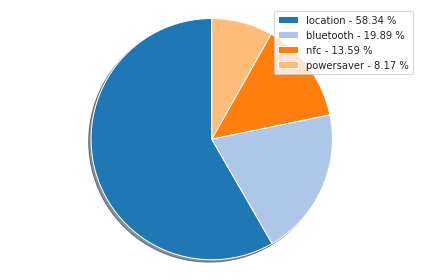

In [9]:
print(dfTopSensors)
pieOthers(dfTopSensors['sensors'], dfTopSensors['count'],0)

  bluetooth_enabled     count
0                No  20237224
1               Yes   3363277


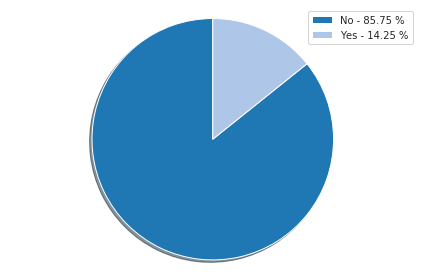

In [10]:
print(dfBluetoothGB)

pieOthers(dfBluetoothGB['bluetooth_enabled'], dfBluetoothGB['count'],0)

  location_enabled     count
0               No  13736818
1              Yes   9863683


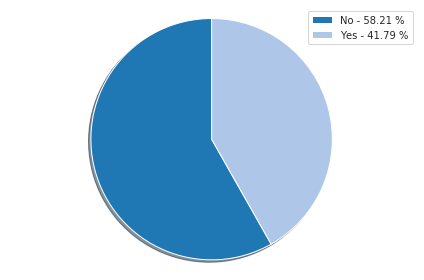

In [11]:
print(dfLocationGB)

pieOthers(dfLocationGB['location_enabled'], dfLocationGB['count'],0)

  power_saver_enabled     count
0                  No  22218439
1                 Yes   1382062


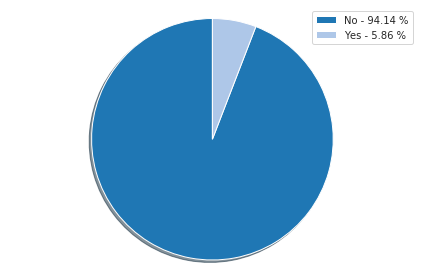

In [12]:
print(dfPowerSaverGB)

pieOthers(dfPowerSaverGB['power_saver_enabled'], dfPowerSaverGB['count'],0)

  flashlight_enabled     count
0                 No  23600501


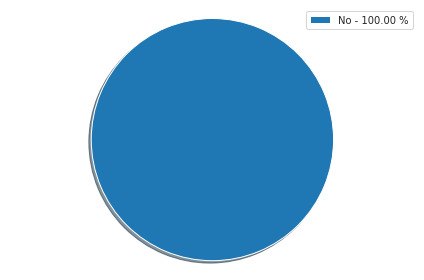

In [13]:
print(dfFlashlightGB)

pieOthers(dfFlashlightGB['flashlight_enabled'], dfFlashlightGB['count'],0)

  nfc_enabled     count
0          No  21302186
1         Yes   2298315


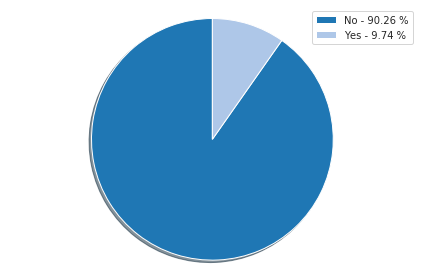

In [14]:
print(dfNfcGB)

pieOthers(dfNfcGB['nfc_enabled'], dfNfcGB['count'],0)

  unknown_sources     count
1             Yes  13450808
0              No  10141442
2             Yes      8251


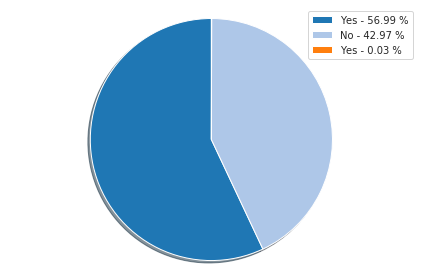

In [15]:
print(dfUnknownGB)

pieOthers(dfUnknownGB['unknown_sources'], dfUnknownGB['count'],0)

  developer_mode     count
0             No  21233661
1            Yes   2366840


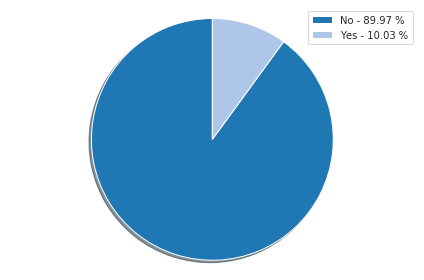

In [16]:
print(dfDeveloperGB)

pieOthers(dfDeveloperGB['developer_mode'], dfDeveloperGB['count'],0)